# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier

# Load Data

In [57]:
file_path = 'dataset\\train.csv'
df = pd.read_csv(file_path)
print(df.head())

   sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [58]:
print(df.info)

<bound method DataFrame.info of      sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1       0  67.00   Others  91.00   Others  Commerce     58.00   
1        2       0  79.33  Central  78.33   Others   Science     77.48   
2        3       0  65.00  Central  68.00  Central      Arts     64.00   
3        4       0  56.00  Central  52.00  Central   Science     52.00   
4        5       0  85.80  Central  73.60  Central  Commerce     73.30   
..     ...     ...    ...      ...    ...      ...       ...       ...   
210    211       0  80.60   Others  82.00   Others  Commerce     77.60   
211    212       0  58.00   Others  60.00   Others   Science     72.00   
212    213       0  67.00   Others  67.00   Others  Commerce     73.00   
213    214       1  74.00   Others  66.00   Others  Commerce     58.00   
214    215       0  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0 

In [31]:
# Drop the 'sl_no' column as it's not needed
df.drop('sl_no', axis=1, inplace=True)

# Data Preprocessing

### Comprehensive exploratory data analysis (EDA)

In [32]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 23.6+ KB
None


In [33]:
print("\nStatistical Summary:")
print(df.describe(include='all'))


Statistical Summary:
            gender       ssc_p    ssc_b       hsc_p   hsc_b     hsc_s  \
count   215.000000  215.000000      215  215.000000     215       215   
unique         NaN         NaN        2         NaN       2         3   
top            NaN         NaN  Central         NaN  Others  Commerce   
freq           NaN         NaN      116         NaN     131       113   
mean      0.353488   67.303395      NaN   66.333163     NaN       NaN   
std       0.479168   10.827205      NaN   10.897509     NaN       NaN   
min       0.000000   40.890000      NaN   37.000000     NaN       NaN   
25%       0.000000   60.600000      NaN   60.900000     NaN       NaN   
50%       0.000000   67.000000      NaN   65.000000     NaN       NaN   
75%       1.000000   75.700000      NaN   73.000000     NaN       NaN   
max       1.000000   89.400000      NaN   97.700000     NaN       NaN   

          degree_p   degree_t workex     etest_p specialisation       mba_p  \
count   215.000000    

In [34]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


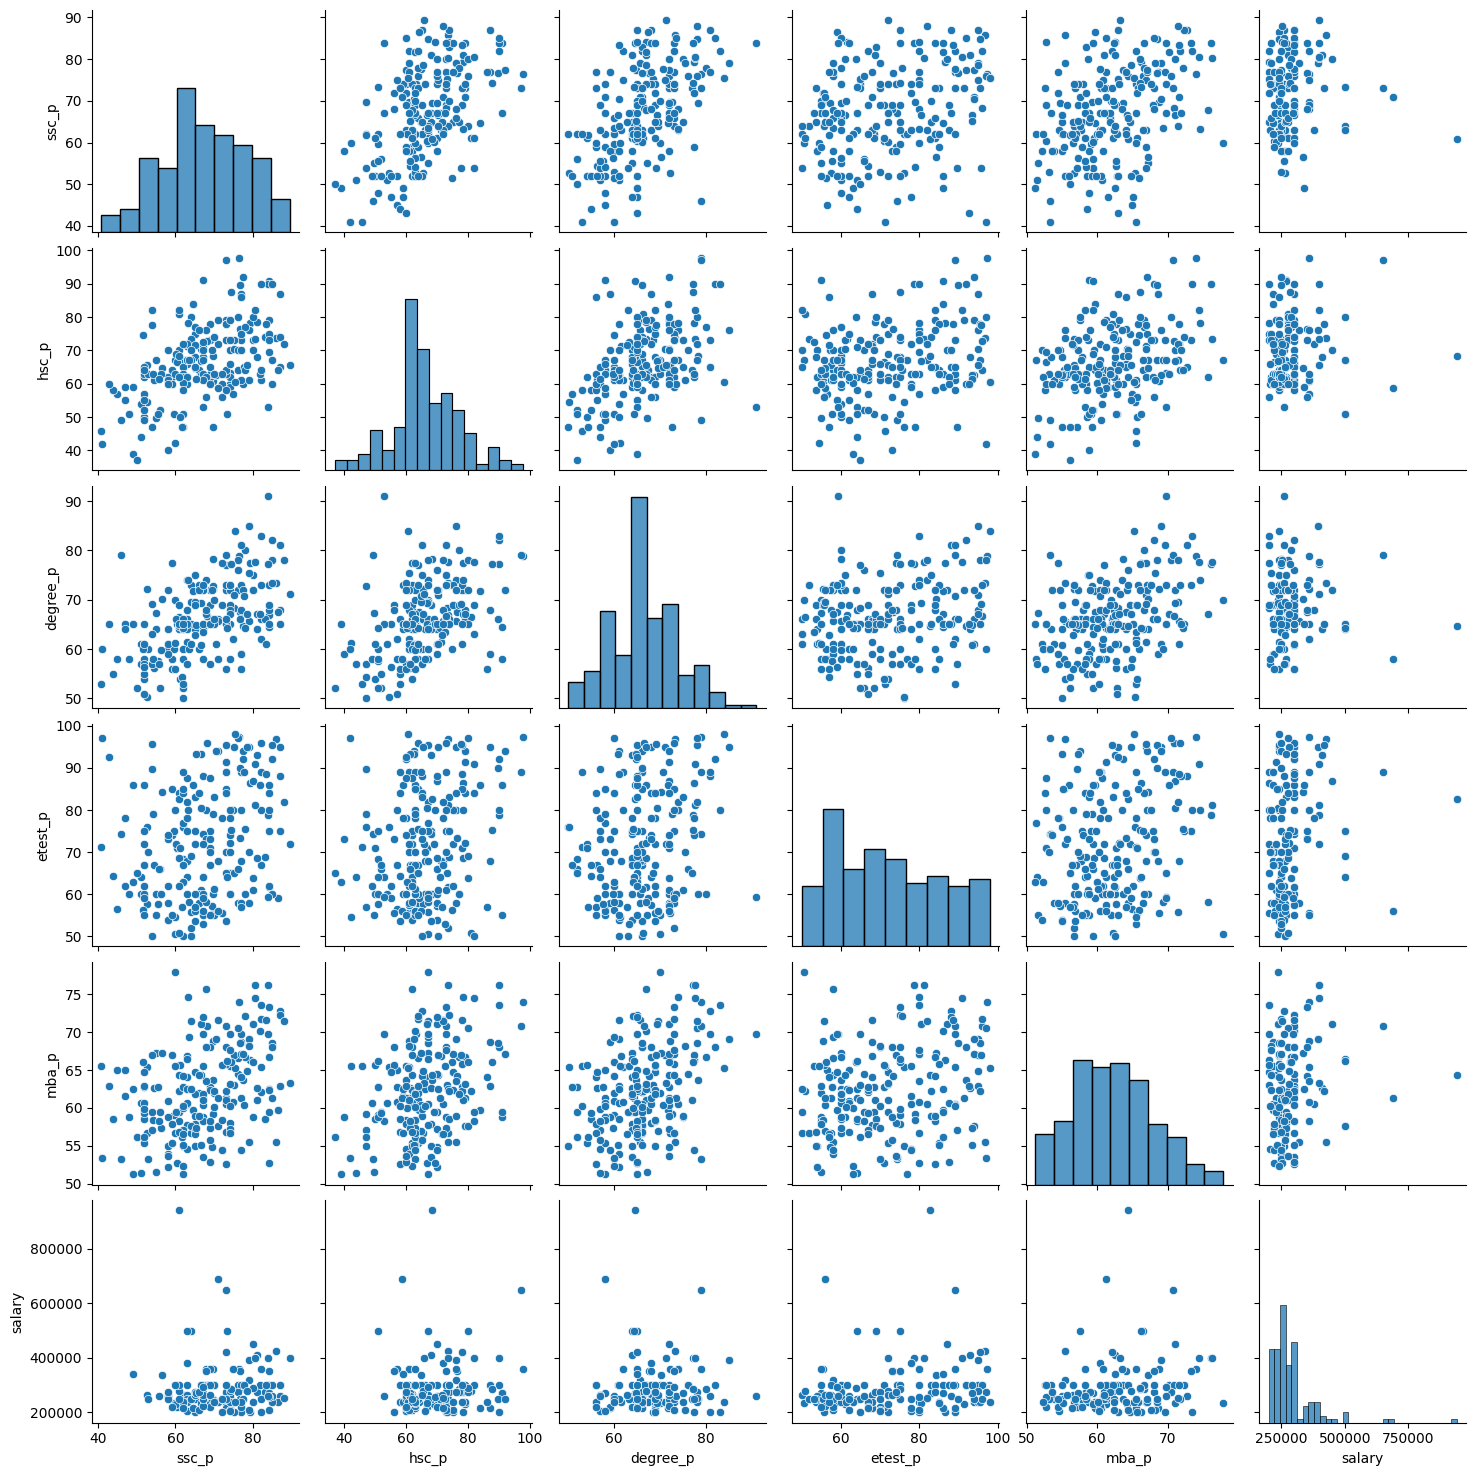

In [35]:
# Visualize the distribution of numerical features
numeric_features = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
sns.pairplot(df[numeric_features])
plt.show()

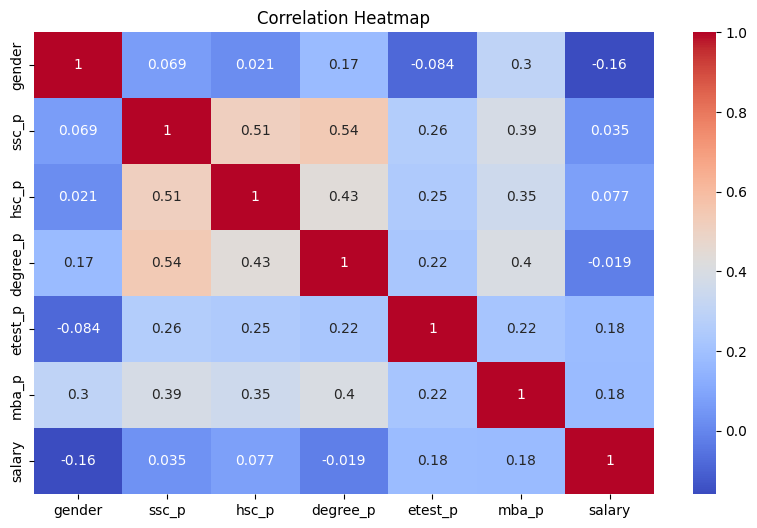

In [36]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [37]:
# Check unique values for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in ssc_b: ['Others' 'Central']
Unique values in hsc_b: ['Others' 'Central']
Unique values in hsc_s: ['Commerce' 'Science' 'Arts']
Unique values in degree_t: ['Sci&Tech' 'Comm&Mgmt' 'Others']
Unique values in workex: ['No' 'Yes']
Unique values in specialisation: ['Mkt&HR' 'Mkt&Fin']
Unique values in status: ['Placed' 'Not Placed']


### Handle missing values

In [ ]:
# Filter the missing 

In [62]:
# Filter and print status where 'salary' is null
status_for_empty_salary = df.loc[df['salary'].isnull(), 'status'].unique()
print(status_for_empty_salary)

['Not Placed']


In [63]:
# Replace missing values in 'salary' column with 0
df['salary'] = df['salary'].fillna(0)
print(df.isnull().sum())

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64


### Encode Categorical Features and Target Variable

In [39]:
# Binary features with Label Encoding
binary_features = ['ssc_b', 'hsc_b', 'workex', 'specialisation', 'status']
for col in binary_features:
    df[col] = df[col].map({val: i for i, val in enumerate(df[col].unique())})

# Nominal features with One-Hot Encoding
nominal_features = ['hsc_s', 'degree_t']
df = pd.get_dummies(df, columns=nominal_features, drop_first=False)

In [40]:
print(df.head())

   gender  ssc_p  ssc_b  hsc_p  hsc_b  degree_p  workex  etest_p  \
0       0  67.00      0  91.00      0     58.00       0     55.0   
1       0  79.33      1  78.33      0     77.48       1     86.5   
2       0  65.00      1  68.00      1     64.00       0     75.0   
3       0  56.00      1  52.00      1     52.00       0     66.0   
4       0  85.80      1  73.60      1     73.30       0     96.8   

   specialisation  mba_p  status    salary  hsc_s_Arts  hsc_s_Commerce  \
0               0  58.80       0  270000.0       False            True   
1               1  66.28       0  200000.0       False           False   
2               1  57.80       0  250000.0        True           False   
3               0  59.43       1  265000.0       False           False   
4               1  55.50       0  425000.0       False            True   

   hsc_s_Science  degree_t_Comm&Mgmt  degree_t_Others  degree_t_Sci&Tech  
0          False               False            False               Tru

### Split Data into Training and Test Sets

In [41]:
# Split the data into features and target
X = df.drop('status', axis=1)
y = df['status']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [42]:
print("Training Set Size:", X_train.shape)
print("Test Set Size:", X_test.shape)

Training Set Size: (150, 17)
Test Set Size: (65, 17)


In [43]:
# Feature scaling for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection

In [44]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "k-NN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Model Training

In [45]:
# Train the models
trained_models = {}

for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

Training Logistic Regression
Training Decision Tree
Training Random Forest
Training SVM
Training k-NN
Training Gradient Boosting


# Model Evaluation

In [46]:
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

print("\nBASE MODEL PERFORMANCE COMPARISON:")
print(pd.DataFrame(results).T)


BASE MODEL PERFORMANCE COMPARISON:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.923077   0.924575  0.923077  0.923583  0.973333
Decision Tree        0.953846   0.954962  0.953846  0.954150  0.952778
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  0.876923   0.875068  0.876923  0.875022  0.946667
k-NN                 0.830769   0.833417  0.830769  0.831882  0.867778
Gradient Boosting    0.969231   0.969231  0.969231  0.969231  0.994444


# Hyperparameter tuning

In [47]:
# Perform hyperparameter tuning for each model 
param_grid = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "Decision Tree": {"max_depth": [3, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "k-NN": {"n_neighbors": [3, 5, 7]},
    "Gradient Boosting": {"n_estimators": [50, 100, 200]}
}

tuned_models = {}

for name, model in models.items():
    print(f"Performing hyperparameter tuning for {name}")
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    tuned_models[name] = best_model
    print(f"{name} - Best Parameters: {grid_search.best_params_}")

Performing hyperparameter tuning for Logistic Regression
Logistic Regression - Best Parameters: {'C': 1}
Performing hyperparameter tuning for Decision Tree
Decision Tree - Best Parameters: {'max_depth': 10}
Performing hyperparameter tuning for Random Forest
Random Forest - Best Parameters: {'n_estimators': 50}
Performing hyperparameter tuning for SVM
SVM - Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Performing hyperparameter tuning for k-NN
k-NN - Best Parameters: {'n_neighbors': 5}
Performing hyperparameter tuning for Gradient Boosting
Gradient Boosting - Best Parameters: {'n_estimators': 200}


In [48]:
# Evaluate the models after tuning 
results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted'),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

    print(f"\n{name} - Model Performance:")
    print(classification_report(y_test, y_pred))


Logistic Regression - Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.86      0.90      0.88        20

    accuracy                           0.92        65
   macro avg       0.91      0.92      0.91        65
weighted avg       0.92      0.92      0.92        65


Decision Tree - Model Performance:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.90      0.95      0.93        20

    accuracy                           0.95        65
   macro avg       0.94      0.95      0.95        65
weighted avg       0.95      0.95      0.95        65


Random Forest - Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        20

    accuracy                           1.00        65
   macro avg  

In [49]:
# Compare the performance of tuned models
print("\nMODEL PERFORMANCE AFTER HYPERPARAMETER TUNING:")
print(pd.DataFrame(results).T)


MODEL PERFORMANCE AFTER HYPERPARAMETER TUNING:
                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.923077   0.924575  0.923077  0.923583  0.973333
Decision Tree        0.953846   0.954962  0.953846  0.954150  0.952778
Random Forest        1.000000   1.000000  1.000000  1.000000  1.000000
SVM                  0.876923   0.875068  0.876923  0.875022  0.946667
k-NN                 0.830769   0.833417  0.830769  0.831882  0.867778
Gradient Boosting    0.969231   0.969231  0.969231  0.969231  0.994444


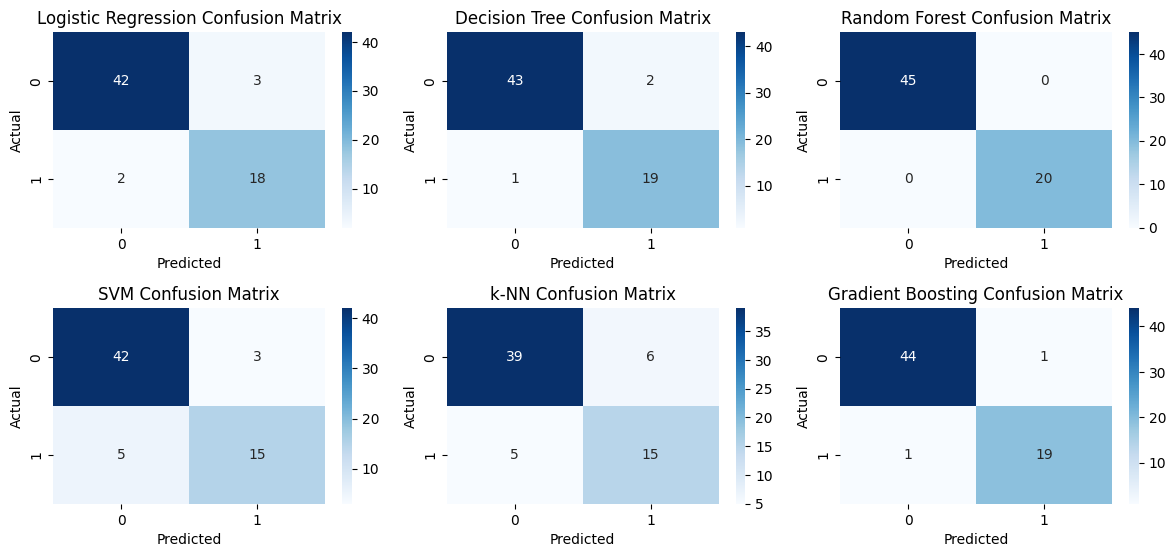

In [50]:
# Confusion matrix for each model
plt.figure(figsize=(12, 8))
for i, (name, model) in enumerate(trained_models.items(), 1):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(3, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Voting Classifier

In [51]:
# Implement Voting Classifier that combines predictions from the models trained above
voting_clf = VotingClassifier(estimators=[
    ("Logistic Regression", trained_models["Logistic Regression"]),
    ("Decision Tree", trained_models["Decision Tree"]),
    ("Random Forest", trained_models["Random Forest"]),
    ("SVM", trained_models["SVM"]),
    ("k-NN", trained_models["k-NN"]),
    ("Gradient Boosting", trained_models["Gradient Boosting"])
], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Random Forest', RandomForestClassifier()),
                             ('SVM', SVC(probability=True)),
                             ('k-NN', KNeighborsClassifier()),
                             ('Gradient Boosting',
                              GradientBoostingClassifier())],
                 voting='soft')

In [52]:
# Evaluate the Voting Classifier
y_pred_voting = voting_clf.predict(X_test_scaled)
y_prob_voting = voting_clf.predict_proba(X_test_scaled)[:, 1]
voting_results = {
    "Accuracy": accuracy_score(y_test, y_pred_voting),
    "Precision": precision_score(y_test, y_pred_voting, average='weighted'),
    "Recall": recall_score(y_test, y_pred_voting, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_voting, average='weighted'),
    "ROC-AUC": roc_auc_score(y_test, y_prob_voting)
}

# Print Performance of the Voting Classifier
print("\nVOTING CLASSIFIER RESULTS")
print(pd.DataFrame(voting_results, index=["Voting Classifier"]))


VOTING CLASSIFIER RESULTS
                   Accuracy  Precision    Recall  F1 Score   ROC-AUC
Voting Classifier  0.969231   0.969231  0.969231  0.969231  0.995556


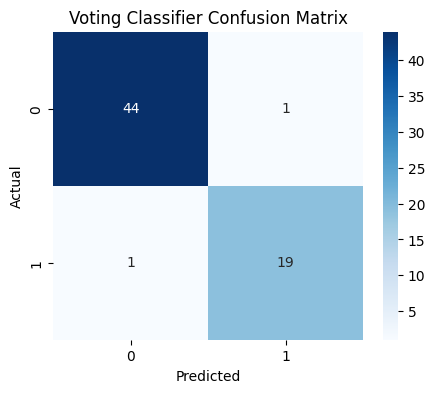

In [53]:
# Confusion matrix for the Voting Classifier
cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues')
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()